**Objective:** To build  different CNN architectures on the MNIST dataset by experimenting with different kernel sizes, Conv2D layers, BatchNorm, Dropout etc.

**Base Model**

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


W0805 12:54:42.673864 140350176786304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 12:54:42.709701 140350176786304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 12:54:42.716486 140350176786304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 12:54:42.758455 140350176786304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0805 12:54:42.761035 140350176786304 deprecation_wrapp

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


W0805 12:54:42.973082 140350176786304 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 195us/step - loss: 0.2607 - acc: 0.9206 - val_loss: 0.0560 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0883 - acc: 0.9738 - val_loss: 0.0451 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0658 - acc: 0.9808 - val_loss: 0.0346 - val_acc: 0.9875
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0532 - acc: 0.9838 - val_loss: 0.0330 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0458 - acc: 0.9863 - val_loss: 0.0296 - val_acc: 0.9894
Epoch 6/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0416 - acc: 0.9874 - val_loss: 0.0278 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0355 - acc: 0.9890 - val_loss: 0.0269 - val_a

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# Model 1

# kernel [2*2]
# strides= (1, 1)
# 3 Conv2D layers followed by 2 MaxPool layers of size (2,2)
# 3 hidden layers


model = Sequential()

model.add(Conv2D(16, kernel_size=(2, 2), strides=(1, 1), activation='relu', input_shape=input_shape))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))

model.add(Dense(num_classes, activation='softmax'))



model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 71us/step - loss: 0.5173 - acc: 0.8329 - val_loss: 0.0833 - val_acc: 0.9750
Epoch 2/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.1582 - acc: 0.9534 - val_loss: 0.0551 - val_acc: 0.9829
Epoch 3/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.1194 - acc: 0.9653 - val_loss: 0.0431 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.1028 - acc: 0.9701 - val_loss: 0.0448 - val_acc: 0.9866
Epoch 5/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0909 - acc: 0.9737 - val_loss: 0.0395 - val_acc: 0.9884
Epoch 6/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0829 - acc: 0.9759 - val_loss: 0.0330 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0766 - acc: 0.9773 - val_loss: 0.0333 - val_acc

Test score: 0.031007640762219672
Test accuracy: 0.991


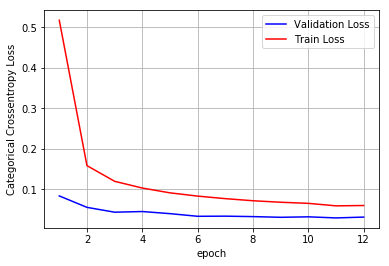

In [0]:
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# Model 2

# kernel [5*5]
# strides= (2, 2)
# padding = 'same'
# maxpoolsize= (4,4)
# optimizer = 'adam'
# conv2d -> dense(512) -> conv2d-maxpool-dropout-flatten -> dense(256) -> dense(128) 


model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), strides= (2, 2), activation='relu', input_shape=input_shape, padding = 'same'))

model.add(Dense(512, activation='relu'))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))


#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.3011 - acc: 0.9024 - val_loss: 0.0463 - val_acc: 0.9845
Epoch 2/12
60000/60000 [==============================] - 8s 138us/step - loss: 0.0912 - acc: 0.9722 - val_loss: 0.0307 - val_acc: 0.9902
Epoch 3/12
60000/60000 [==============================] - 8s 138us/step - loss: 0.0666 - acc: 0.9801 - val_loss: 0.0284 - val_acc: 0.9917
Epoch 4/12
60000/60000 [==============================] - 8s 139us/step - loss: 0.0567 - acc: 0.9824 - val_loss: 0.0244 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 8s 139us/step - loss: 0.0481 - acc: 0.9855 - val_loss: 0.0232 - val_acc: 0.9925
Epoch 6/12
60000/60000 [==============================] - 8s 139us/step - loss: 0.0393 - acc: 0.9877 - val_loss: 0.0226 - val_acc: 0.9928
Epoch 7/12
60000/60000 [==============================] - 8s 139us/step - loss: 0.0367 - acc: 0.9886 - val_loss: 0.0262 -

Test score: 0.023104002257308093
Test accuracy: 0.9926


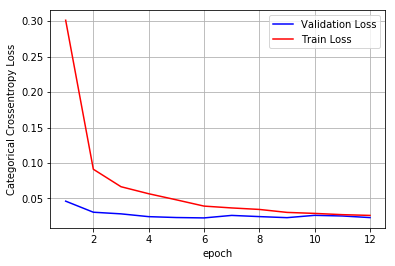

In [0]:
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# Model 3

# kernel [7*7]
# strides= (3, 3)
# optimizer = 'RMSprop'
# used BatchNorm

from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(7, 7), strides= (2, 2), activation='relu', input_shape=input_shape, padding = 'same'))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())


model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy, optimizer='RMSprop', metrics=['accuracy'])


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 68us/step - loss: 0.1829 - acc: 0.9433 - val_loss: 0.0827 - val_acc: 0.9746
Epoch 2/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0831 - acc: 0.9751 - val_loss: 0.0382 - val_acc: 0.9868
Epoch 3/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0682 - acc: 0.9802 - val_loss: 0.0494 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0608 - acc: 0.9819 - val_loss: 0.0378 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0567 - acc: 0.9847 - val_loss: 0.0351 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0503 - acc: 0.9863 - val_loss: 0.0301 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0484 - acc: 0.9860 - val_loss: 0.0257 - val_acc

Test score: 0.032838189678625986
Test accuracy: 0.9918


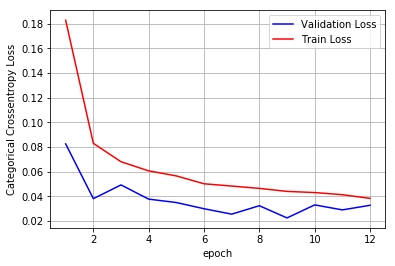

In [0]:
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [5]:
# Model 4

# kernel [2*2]
# strides= (1, 1)
# 3 Conv2D layers followed by 2 MaxPool layers of size (2,2)
# 3 hidden layers
# kernel_initializer = 'lecun_normal'
# activation='tanh'
# optimizer = 'sgd'


model = Sequential()

model.add(Conv2D(16, kernel_size=(2, 2), strides=(1, 1), activation='tanh', input_shape=input_shape, kernel_initializer = 'lecun_normal' ))

model.add(Conv2D(32, (2, 2), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (2, 2), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.35))

model.add(Dense(num_classes, activation='softmax'))



model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 60us/step - loss: 1.3202 - acc: 0.5844 - val_loss: 0.5548 - val_acc: 0.8576
Epoch 2/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.6239 - acc: 0.8109 - val_loss: 0.3711 - val_acc: 0.8946
Epoch 3/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.4838 - acc: 0.8536 - val_loss: 0.3000 - val_acc: 0.9126
Epoch 4/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.4092 - acc: 0.8775 - val_loss: 0.2503 - val_acc: 0.9252
Epoch 5/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.3532 - acc: 0.8927 - val_loss: 0.2086 - val_acc: 0.9362
Epoch 6/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.3076 - acc: 0.9078 - val_loss: 0.1841 - val_acc: 0.9444
Epoch 7/12
60000/60000 [==============================] - 3s 51us/step - loss: 0.2745 - acc: 0.9190 - val_loss: 0.1570 - val_acc

Test score: 0.09795933519154787
Test accuracy: 0.9694


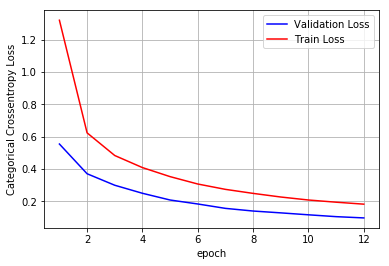

In [6]:
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [7]:
# Model 5

# kernel [5*5]
# strides= (2, 2)
# padding = 'same'
# maxpoolsize= (4,4)
# optimizer = 'nadam'
# conv2d -> dense(512) -> conv2d-maxpool-dropout-flatten -> dense(256) -> dense(128) 
# kernel_initializer = 'he_uniform'
# activation_function = 'elu'
# optimizer = 'nadam'


model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), strides= (2, 2), activation='elu', input_shape=input_shape, padding = 'same', kernel_initializer = 'he_uniform'))

model.add(Dense(512, activation='elu'))

model.add(Conv2D(64, (5, 5), activation='elu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='elu'))
model.add(Dropout(0.5))


model.add(Dense(128, activation='elu'))

model.add(Dense(num_classes, activation='softmax'))


#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='nadam', metrics=['accuracy'])


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.2545 - acc: 0.9221 - val_loss: 0.0667 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.1154 - acc: 0.9649 - val_loss: 0.0482 - val_acc: 0.9845
Epoch 3/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0913 - acc: 0.9731 - val_loss: 0.0480 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0804 - acc: 0.9764 - val_loss: 0.0413 - val_acc: 0.9880
Epoch 5/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.0718 - acc: 0.9786 - val_loss: 0.0442 - val_acc: 0.9871
Epoch 6/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.0703 - acc: 0.9790 - val_loss: 0.0347 - val_acc: 0.9886
Epoch 7/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0624 - acc: 0.9815 - val_loss: 0.0353 -

Test score: 0.02910749071416212
Test accuracy: 0.9915


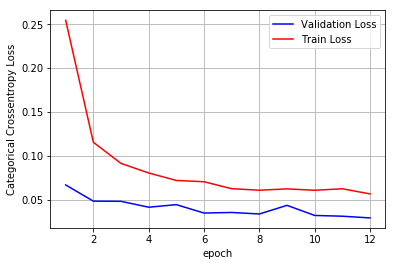

In [8]:
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [10]:
# Model 6

# kernel [7*7]
# strides= (3, 3)
# optimizer = 'RMSprop'
# used BatchNorm
# kernel_initializer = 'glorot_normal'
# optimizer='adamax'
# activation='selu'


from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(7, 7), strides= (2, 2), activation='selu', input_shape=input_shape, padding = 'same', kernel_initializer = 'glorot_normal'))

model.add(Conv2D(64, (2, 2), activation='selu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256,activation='selu'))
model.add(BatchNormalization())


model.add(Dense(512,activation='selu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adamax', metrics=['accuracy'])


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.2107 - acc: 0.9361 - val_loss: 0.0567 - val_acc: 0.9820
Epoch 2/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.1016 - acc: 0.9688 - val_loss: 0.0520 - val_acc: 0.9831
Epoch 3/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0850 - acc: 0.9747 - val_loss: 0.0510 - val_acc: 0.9835
Epoch 4/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0750 - acc: 0.9775 - val_loss: 0.0565 - val_acc: 0.9825
Epoch 5/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0679 - acc: 0.9786 - val_loss: 0.0430 - val_acc: 0.9868
Epoch 6/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0618 - acc: 0.9812 - val_loss: 0.0358 - val_acc: 0.9880
Epoch 7/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0548 - acc: 0.9834 - val_loss: 0.0364 - val_acc

Test score: 0.030372555697989446
Test accuracy: 0.9902


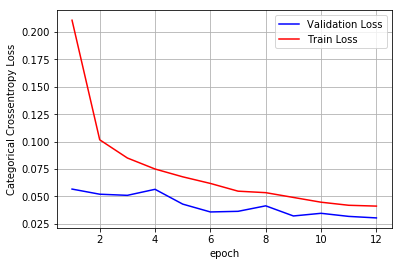

In [11]:
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


**Summary**

1. Created 3 different models of kernel size: [2 * 2], [5 * 5], [7 * 7]
2. Tried different number of conv layer, max pooling layers, dropout rates and optimizer.
3. Plotted error charts

**Model details**

1. Model 1:
    *  kernel [2*2]
    *  strides= (1, 1)
    *  3 Conv2D layers followed by 2 MaxPool layers of size (2,2)
    *  3 hidden layers
    
2. Model 2:
    * kernel [5*5]
    * strides= (2, 2)
    *  padding = 'same'
    * maxpoolsize= (4,4)
    * optimizer = 'adam'
    * conv2d -> dense(512) -> conv2d-maxpool-dropout-flatten -> dense(256) -> dense(128) 

3. Model 3: 
    * kernel [7*7]
    * strides= (3, 3)
    * optimizer = 'RMSprop'
    * used BatchNorm
    
4. Model 4:
    *  kernel [2*2]
    *  strides= (1, 1)
    *  3 Conv2D layers followed by 2 MaxPool layers of size (2,2)
    *  3 hidden layers
    * kernel_initializer = 'lecun_normal'
    * activation='tanh'
    * optimizer = 'sgd'
    
5. Model 5:
    * kernel [5*5]
    * strides= (2, 2)
    *  padding = 'same'
    * maxpoolsize= (4,4)
    * optimizer = 'adam'
    * conv2d -> dense(512) -> conv2d-maxpool-dropout-flatten -> dense(256) -> dense(128) 
    * kernel_initializer = 'he_uniform'
    * activation_function = 'elu'
    * optimizer = 'nadam'

6. Model 6: 
    * kernel [7*7]
    * strides= (3, 3)
    * optimizer = 'RMSprop'
    * used BatchNorm    
    * kernel_initializer = 'glorot_normal'
    * optimizer='adamax'
    * activation='selu'
    
    

In [12]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Initializer", "Activation Function", "Optimizer","Test Loss", "Test Accuracy", ]

# previous models
x.add_row(["Model 1", "glorot_uniform", "relu", "Adadelta", 0.02941559650871495, 0.9911])
x.add_row(["Model 2", "glorot_uniform", "relu", "adam", 0.024007717339053488, 0.9919])
x.add_row(["Model 3", "glorot_uniform", "relu", "RMSprop", 0.03607280582701592, 0.991])

# new models 
x.add_row(["Model 4", "lecun_normal", "tanh", "sgd", 0.09795933519154787, 0.9694])
x.add_row(["Model 5", "he_uniform", "elu", "nadam", 0.02910749071416212, 0.9915])
x.add_row(["Model 6", "glorot_normal", "selu", "adamax", 0.030372555697989446, 0.9902])

print(x)

+---------+----------------+---------------------+-----------+----------------------+---------------+
|  Model  |  Initializer   | Activation Function | Optimizer |      Test Loss       | Test Accuracy |
+---------+----------------+---------------------+-----------+----------------------+---------------+
| Model 1 | glorot_uniform |         relu        |  Adadelta | 0.02941559650871495  |     0.9911    |
| Model 2 | glorot_uniform |         relu        |    adam   | 0.024007717339053488 |     0.9919    |
| Model 3 | glorot_uniform |         relu        |  RMSprop  | 0.03607280582701592  |     0.991     |
| Model 4 |  lecun_normal  |         tanh        |    sgd    | 0.09795933519154787  |     0.9694    |
| Model 5 |   he_uniform   |         elu         |   nadam   | 0.02910749071416212  |     0.9915    |
| Model 6 | glorot_normal  |         selu        |   adamax  | 0.030372555697989446 |     0.9902    |
+---------+----------------+---------------------+-----------+--------------------